## Hand digit prediction using CNN and MNIST dataset 

In [93]:
import os  
import cv2 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np

In [94]:
mnist = tf.keras.datasets.mnist 
(x_train , y_train) , (x_test , y_test) = mnist.load_data() 
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis=1) 

In [95]:
def predict_img(model):  
    image_number = 1
    print(f"digits/digit{image_number}.png")
    while os.path.isfile(f"digits/digit{image_number}.png"):
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0] 
        img = cv2.resize(img,(28 , 28))     # resize image to match model's expected sizing
        img = np.invert(np.array([img]))
        prediction = model.predict(img) 
        print(prediction)
        print(f"This digit is probably a {np.argmax(prediction)}") 
        plt.imshow(img[0] , cmap = plt.cm.binary)
        plt.show()  
        
        image_number += 1 

- Flatten -> Dense (128) -> Dense(128) -> Dense(10)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2594 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1038 - accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0715 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0395 - accuracy: 0.9877
digits/digit1.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


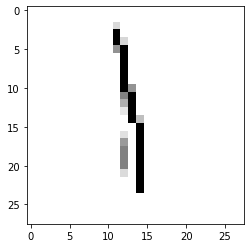

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


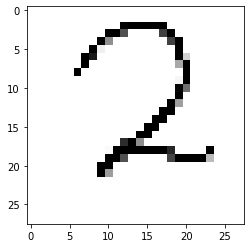

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


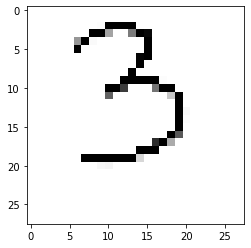

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
This digit is probably a 7


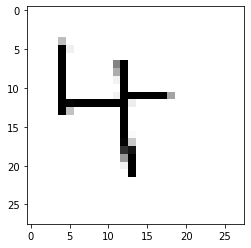

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


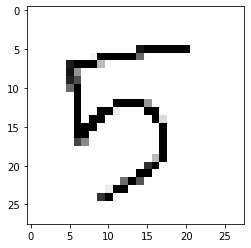

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


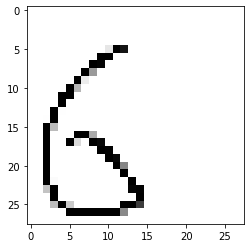

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


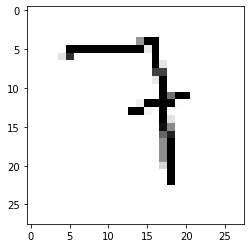

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


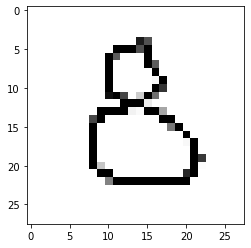

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


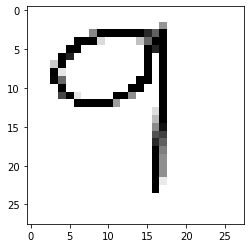

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 0


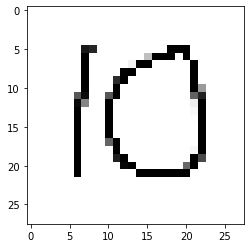

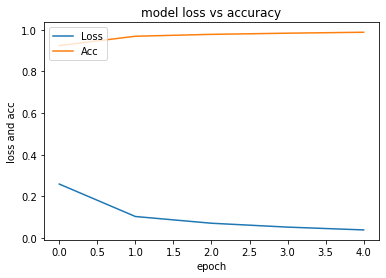

In [106]:
model1 = tf.keras.Sequential() 
model1.add(tf.keras.layers.Flatten(input_shape = (28 , 28))) 
model1.add(tf.keras.layers.Dense(128 , activation='relu'))
model1.add(tf.keras.layers.Dense(128 , activation='relu'))
model1.add(tf.keras.layers.Dense(10 , activation='softmax'))  

model1.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy']) 

history = model1.fit(x_train , y_train , epochs=5) 

predict_img(model1)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.ylabel('loss and acc')
plt.xlabel('epoch')
plt.legend(['Loss', 'Acc'], loc='upper left')
plt.show()



Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0719 - accuracy: 0.9772
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0528 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0396 - accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0328 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0244 - accuracy: 0.9919
digits/digit1.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


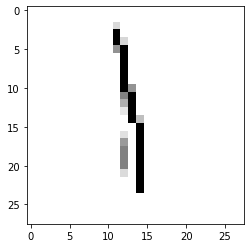

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


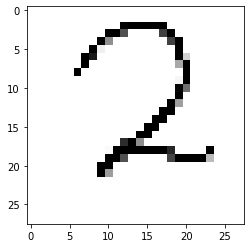

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


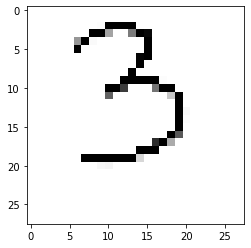

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


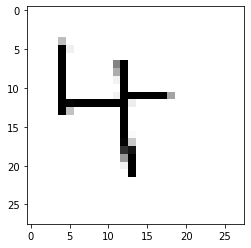

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


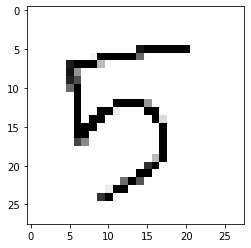

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
This digit is probably a 7


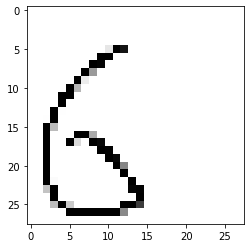

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


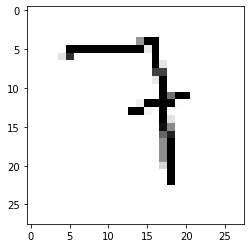

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


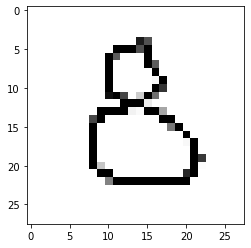

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


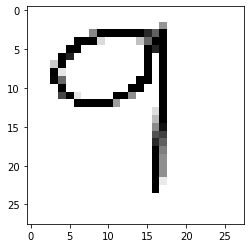

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 0


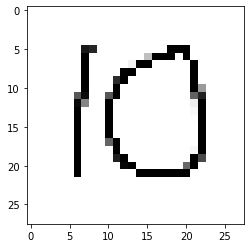

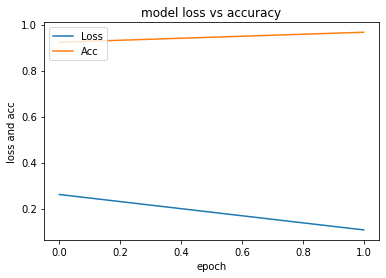

In [97]:
model1.fit(x_train , y_train , epochs=5) 

predict_img(model1)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.ylabel('loss and acc')
plt.xlabel('epoch')
plt.legend(['Loss', 'Acc'], loc='upper left')
plt.show()

- Flatten -> Dense (128) -> Dense(128) -> Dense(64) -> Dense(10)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2552 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0724 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0555 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9857


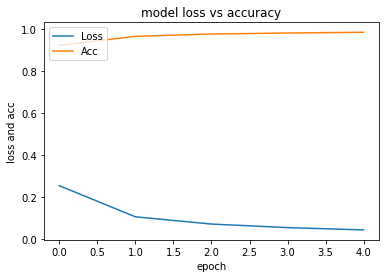

digits/digit1.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


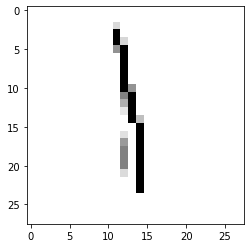

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


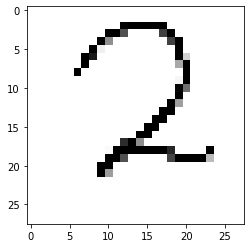

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


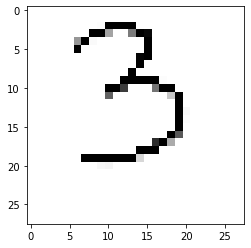

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


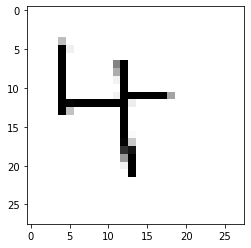

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


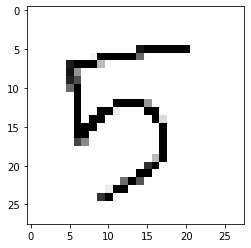

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


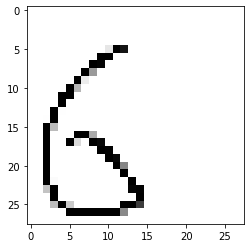

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


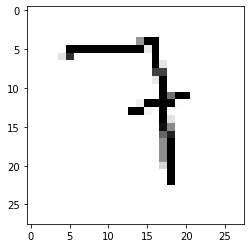

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


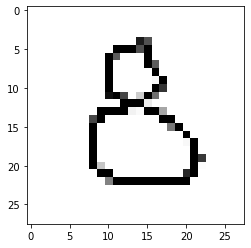

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


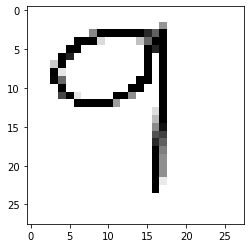

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 0


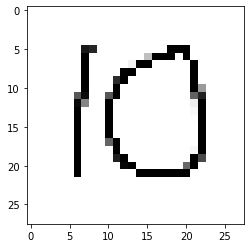

In [98]:
model2 = tf.keras.Sequential() 
model2.add(tf.keras.layers.Flatten(input_shape = (28 , 28))) 
model2.add(tf.keras.layers.Dense(128 , activation='relu'))
model2.add(tf.keras.layers.Dense(128 , activation='relu'))
model2.add(tf.keras.layers.Dense(64 , activation='relu'))
model2.add(tf.keras.layers.Dense(10 , activation='softmax')) 

model2.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy']) 

history = model2.fit(x_train , y_train , epochs=5) 
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.ylabel('loss and acc')
plt.xlabel('epoch')
plt.legend(['Loss', 'Acc'], loc='upper left')   
plt.show()

predict_img(model2)


Flatten -> Dense (128) -> Dense(64) -> Dense(32) -> Dense(10)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2784 - accuracy: 0.9161
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1164 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0793 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0595 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0468 - accuracy: 0.9850
digits/digit1.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


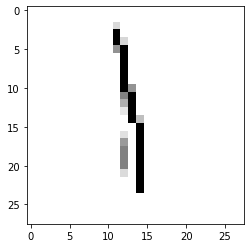

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


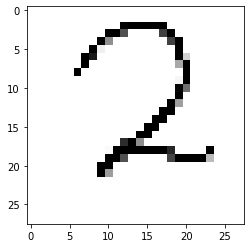

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


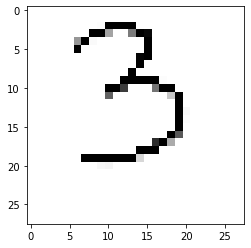

[[0.0000000e+00 1.7741587e-07 2.5097461e-14 9.9999988e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
This digit is probably a 3


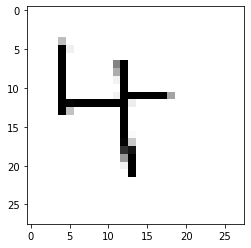

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


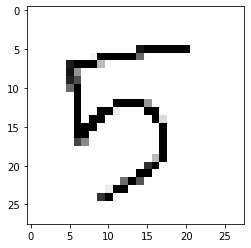

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


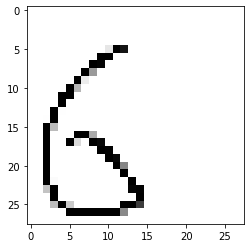

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


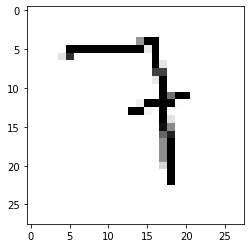

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


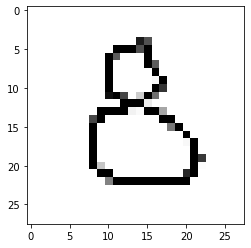

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


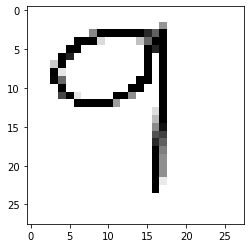

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 0


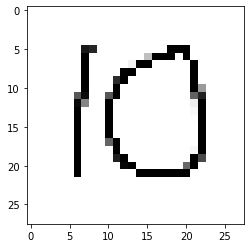

In [99]:
model3 = tf.keras.Sequential() 
model3.add(tf.keras.layers.Flatten(input_shape = (28 , 28))) 
model3.add(tf.keras.layers.Dense(128 , activation='relu'))
model3.add(tf.keras.layers.Dense(64 , activation='relu'))
model3.add(tf.keras.layers.Dense(32 , activation='relu'))
model3.add(tf.keras.layers.Dense(10 , activation='softmax')) 

model3.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy']) 

model3.fit(x_train , y_train , epochs=5)
predict_img(model3)


Flatten -> Dense (128) -> Dropout -> Dense(128) -> Dense(10)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3247 - accuracy: 0.9025
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1585 - accuracy: 0.9510
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1257 - accuracy: 0.9613
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1041 - accuracy: 0.9670
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0923 - accuracy: 0.9705
digits/digit1.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


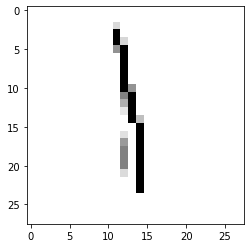

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


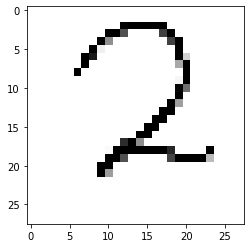

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


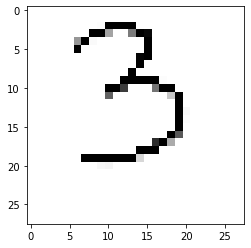

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3872565e-04 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.9986124e-01 0.0000000e+00 0.0000000e+00]]
This digit is probably a 7


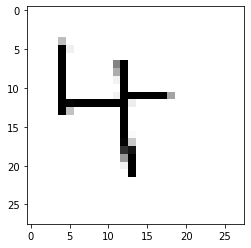

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
This digit is probably a 5


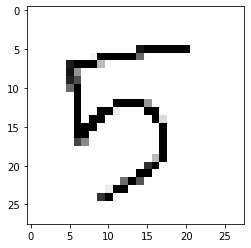

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


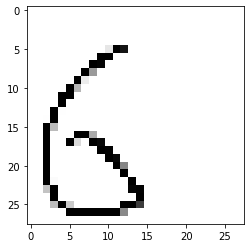

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


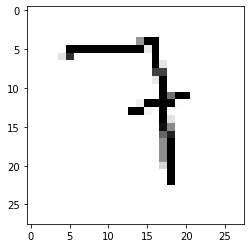

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This digit is probably a 8


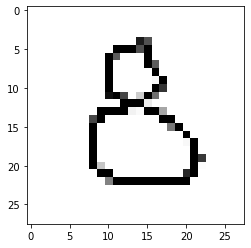

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


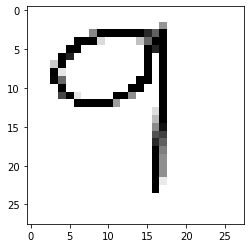

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 0


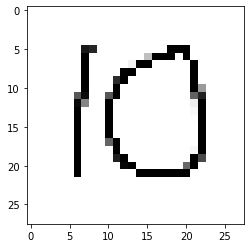

In [100]:
model4 = tf.keras.Sequential() 
model4.add(tf.keras.layers.Flatten(input_shape = (28 , 28))) 
model4.add(tf.keras.layers.Dense(128 , activation='relu'))
model4.add(tf.keras.layers.Dropout(0.3 , noise_shape=None, seed=None))
model4.add(tf.keras.layers.Dense(128 , activation='relu'))
model4.add(tf.keras.layers.Dense(10 , activation='softmax')) 

model4.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy']) 

model4.fit(x_train , y_train , epochs=5)

predict_img(model4)


Flatten -> Dense (128) -> Batch normalization -> Dropout -> Dense(128) -> Dense(10)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.9096
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1656 - accuracy: 0.9481
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1375 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1186 - accuracy: 0.9626
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1044 - accuracy: 0.9666
digits/digit1.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


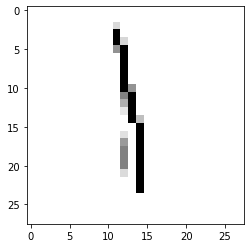

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


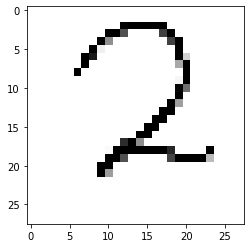

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


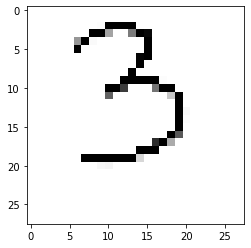

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.6159162e-11 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]
This digit is probably a 7


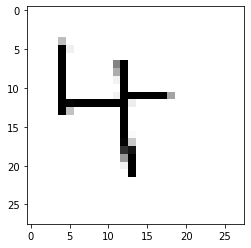

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


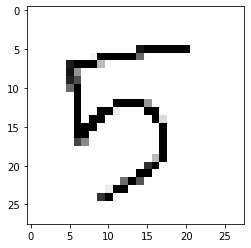

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


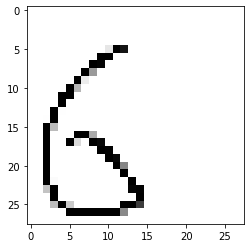

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


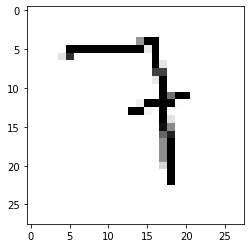

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


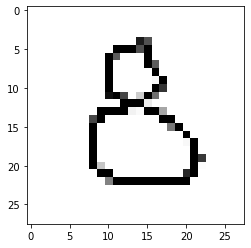

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


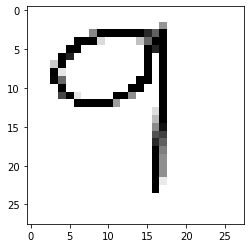

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
This digit is probably a 6


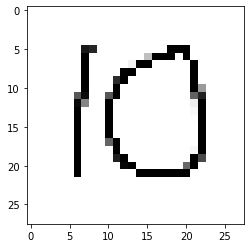

In [101]:
model5 = tf.keras.Sequential() 
model5.add(tf.keras.layers.Flatten(input_shape = (28 , 28))) 
model5.add(tf.keras.layers.Dense(128 , activation='relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Dropout(0.3 , noise_shape=None, seed=None))
model5.add(tf.keras.layers.Dense(128 , activation='relu'))
model5.add(tf.keras.layers.Dense(10 , activation='softmax')) 

model5.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy']) 

model5.fit(x_train , y_train , epochs=5)
predict_img(model5)

Flatten -> Dense (128) -> Batch normalization -> Dropout -> Dense(64) -> Dense(10)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.9043
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1758 - accuracy: 0.9462
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1452 - accuracy: 0.9542
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1251 - accuracy: 0.9606
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1134 - accuracy: 0.9639
digits/digit1.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


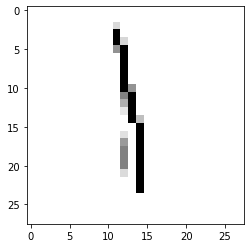

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 2


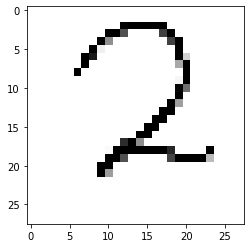

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 2.5932018e-13 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
This digit is probably a 2


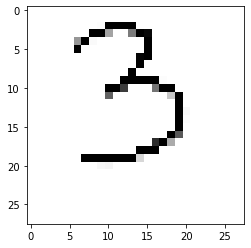

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


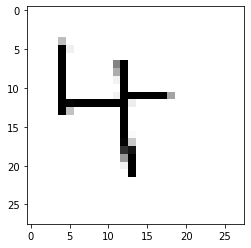

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


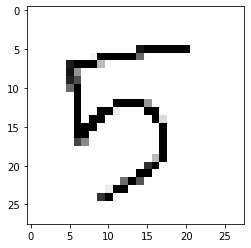

[[0.         0.         0.19144103 0.808559   0.         0.
  0.         0.         0.         0.        ]]
This digit is probably a 3


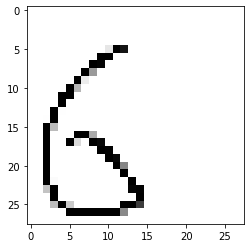

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


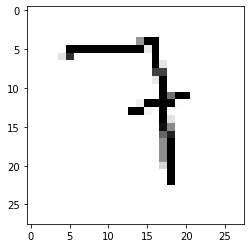

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


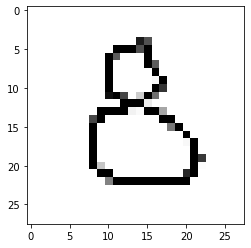

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


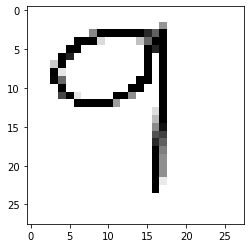

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.8566734e-28 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
This digit is probably a 8


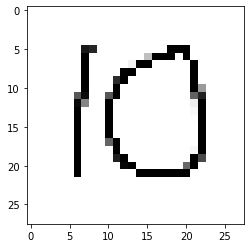

In [108]:
model6 = tf.keras.Sequential() 
model6.add(tf.keras.layers.Flatten(input_shape = (28 , 28))) 
model6.add(tf.keras.layers.Dense(128 , activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.Dropout(0.3 , noise_shape=None, seed=None))
model6.add(tf.keras.layers.Dense(64 , activation='relu'))
model6.add(tf.keras.layers.Dense(10 , activation='softmax')) 

model6.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy']) 

model6.fit(x_train , y_train , epochs=5)
predict_img(model6)


## Save the model and load the model to test 

In [103]:
model6.save('hand_digit.h5')

In [104]:
model = tf.keras.models.load_model('hand_digit.h5') 

loss , accuracy = model.evaluate(x_test , y_test ) 
print(loss) 
print(accuracy)

313/313 [==============================] - 0s 856us/step - loss: 0.0918 - accuracy: 0.9740
0.09175962954759598
0.9739999771118164


digits/digit1.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 1


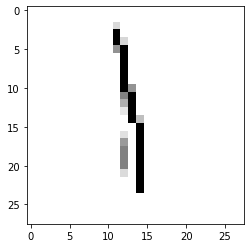

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


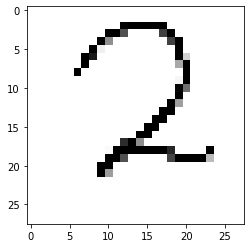

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


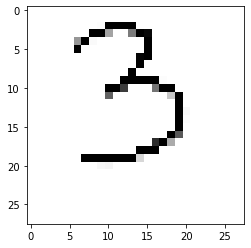

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
This digit is probably a 5


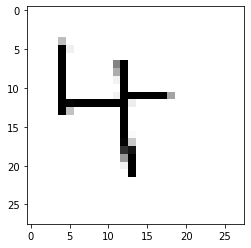

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


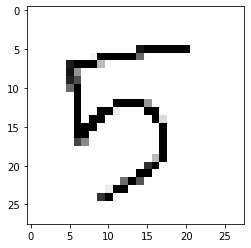

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


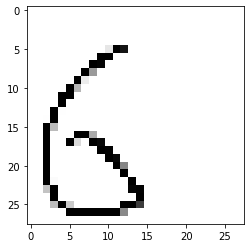

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


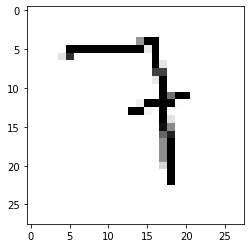

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


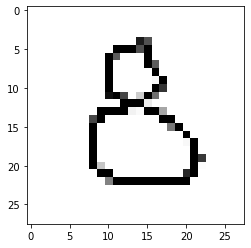

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


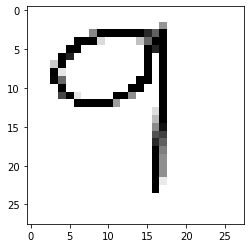

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
This digit is probably a 3


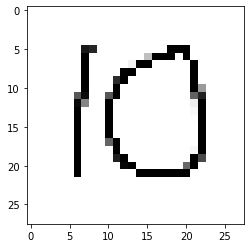

In [105]:
model = tf.keras.models.load_model('hand_digit.h5') 
image_number = 1
print(f"digits/digit{image_number}.png")
while os.path.isfile(f"digits/digit{image_number}.png"):
    try: 
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0] 
        img = cv2.resize(img,(28 , 28))     # resize image to match model's expected sizing
        img = np.invert(np.array([img]))
        prediction = model.predict(img) 
        print(prediction)
        print(f"This digit is probably a {np.argmax(prediction)}") 
        plt.imshow(img[0] , cmap = plt.cm.binary)
        plt.show() 
    except:
        print('Error')
    finally: 
        image_number += 1 